In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Intro
De la explicación en la documentación sobre el peltier ("prac6 mol peltier.pdf") se sabe que:


$$ \dfrac{\Delta T(s)}{I(s)} = \dfrac{(\alpha T_c)R_{th}}{1+R_{th}C_fs} $$


y que:

$$ Q_f = \alpha\, I\,T_f - \dfrac{I^2\,R}{2}- \dfrac{\Delta T}{R_{th}} $$

$$ P_e = \alpha \, I \, \Delta T + I^2 \, R $$

Con lo cual, podemos deducir un modelo de primer orden del peltier.

Controlando la tensión sobre el peltier y midiendo la corriente y la temperatura se puede realizar un ajuste para obtener $Q_f$, $\alpha$, $R$ y $R_{th}$.

## Parámetros de orden 0

In [71]:
# DATOS
I = np.array([1.08,1.47,1.97,2.35,2.8,0.67])
Tf = np.array([16,13.33,10.5,9,6,18])
Tc = np.array([23,23,23,23,24,23])
V = np.array([2.22,2.94,4,4.67,5.6,1.4])
# CUENTAS
# Con la ecuación de Pe se puede armar un sistema de ecuaciones b=Ax
# con x = [alpha,R] b = Pe@xi = V*I
A=np.vstack([I*(Tc-Tf),I**2]).T
(alpha,R) = np.linalg.lstsq(A,V*I,rcond=None)[0]
# Con la ecuación de Qf se puede armar un sistama de ecuaciones b=Ax
# con x = [Gth,Qf] donde Gth es 1/Rth y b= I^2*R/2 - alfa*I*Delta T
B=np.vstack([-(Tc-Tf),-np.ones([np.size(I)])]).T
(Gth,Qf) = np.linalg.lstsq(B,I**2*R/2-alfa*I*(Tf+273),rcond=None)[0]
Rth=1/Gth
# RESULTADO
print("Alpha es",alpha,"R es",R)
print("Rth es",Rth,"Qf es",Qf)

# VERIFICACIÓN
print(I**2*R/2-alfa*I*(Tf+273))
print(alpha*I*(Tf+273)-I**2/2*R-(Tc-Tf)/Rth, "Y esto es supuestamente Qf") 

Alpha es 0.03561568469688848 R es 1.7770868275800826
Rth es 0.983366581913109 Qf es 2.0027244953007046
[ -9.39984976 -12.1536025  -15.22585298 -17.25148609 -19.1545296
  -6.12027626]
[2.96156709 3.23720405 3.73139908 4.45872649 2.55232669 1.46054906] Y esto es supuestamente Qf


## Obtención de $R_{th}$ y $C_f$

Tau es 11.822373787562052 
La constante es 20.951080322265625
Tmin es -3.555511474609375
Rth es 0.81138526662494
Cf es  14.570604463572176


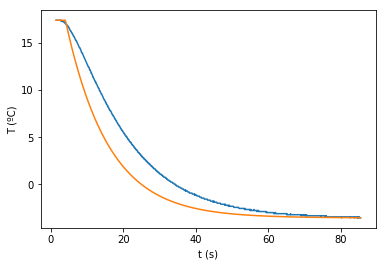

In [73]:
# CARGA DE DATOS ESCALÓN
data = np.loadtxt("data/openloop5V.csv", delimiter=",")
tiempo = data[0,:]
temp = data[1,:]
e=.06 # tolerancia a la exactitud de los puntos de 90% y 10%
# Ploteo los datos para ver que se cargaron bien
plt.plot(tiempo,temp)
plt.xlabel("t (s)")
plt.ylabel("T (ºC)")
Tmax=np.max(temp)
Tmin=np.min(temp)
T10=Tmax+(Tmin-Tmax)*0.1
T90=Tmax+(Tmin-Tmax)*0.9
t10=tiempo[np.logical_and(temp>T10-e, temp<T10+e)]
t90=tiempo[np.logical_and(temp>T90-e, temp<T90+e)]
# Como los valores temporales pueden ser tuplas, o sea 
# que puede haber tiempos donde el valor de la temperatura
# no cambio, tomo aquellos que me dan el tau mas grande
tr=np.max(t90)-np.min(t10)
tau=tr/3
I=2.5
# Esta parte esta medio dibujada por el tema de Tc
Tc=17
Rth=(Tmax-Tmin)/(alpha*(Tc+273))/I
Cf=tau/Rth

# VERIFICACIÓN
Tstart = 4 # El 4 lo saque a ojo
plt.plot(tiempo,Tmax-I*alpha*(Tc+273)*Rth*(1-np.exp(-(tiempo-Tstart)/tau))*np.heaviside(tiempo-Tstart,0.5))
print("Tau es",tau, "\nLa constante es",I*alpha*(Tc+273)*Rth)
print('Tmin es '+ str(Tmin))
print('Rth es '+ str(Rth))
print("Cf es ",Cf)

Tau es 26.960780541102093 
La constante es 7.7860473632812495
Tmax es 20.214447021484375
Tmin es 0.74932861328125
Rth es 36.640222886029406


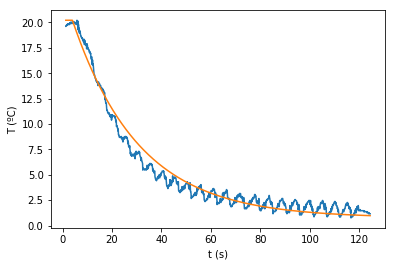

In [14]:
# CARGA DE DATOS ESCALÓN
data = np.loadtxt("data/openloopHand5V.csv", delimiter=",")
tiempo = data[0,:]
temp = data[1,:]
e=.06 # tolerancia a la exactitud de los puntos de 90% y 10%
# Ploteo los datos para ver que se cargaron bien
plt.plot(tiempo,temp)
plt.xlabel("t (s)")
plt.ylabel("T (ºC)")
Tmax=np.max(temp)
Tmin=np.min(temp)
T10=Tmax+(Tmin-Tmax)*0.1
T90=Tmax+(Tmin-Tmax)*0.9
t10=tiempo[np.logical_and(temp>T10-e, temp<T10+e)]
t90=tiempo[np.logical_and(temp>T90-e, temp<T90+e)]
# Como los valores temporales pueden ser tuplas, o sea 
# que puede haber tiempos donde el valor de la temperatura
# no cambio, tomo aquellos que me dan el tau mas grande
tr=np.max(t90)-np.min(t10)
tau=tr/3

# Esta parte esta medio dibujada por el tema de Tc
Tc=17
Rth=(Tmax-Tmin)/(alpha*Tc)/I
Cf=tau/Rth

# VERIFICACIÓN
Tstart = 4 # El 4 lo saque a ojo
plt.plot(tiempo,Tmax-I*alpha*Tc*Rth*(1-np.exp(-(tiempo-Tstart)/tau))*np.heaviside(tiempo-Tstart,0.5))
print("Tau es",tau, "\nLa constante es",alpha*Tc*Rth)
print('Tmax es '+ str(Tmax))
print('Tmin es '+ str(Tmin))
print('Rth es '+ str(Rth))